## Introduction

In this notebook, we will be using the real estate dataset, which includes transaction date, house age, distance to the nearest MRT station, number of convenience stores, latitude, longitude and house price of unit area. We will convert the house price of unit area into several categories based on it's range then we will build several models (Logistic Regression, K Nearest Neighbors, Decision Trees and Random Forest) to predict the price category.
# Main Goal
 
 * Data pre-processing for data exploration and cleaning & feature engineering
 * Check distribution of some key variables
 * Explore the relationship between some key variables 
 * Build several supervised machine learning for classification
 * Comparison of the outcome of several models.

In [1]:
## importing required libraries 
import seaborn as sns, pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
## load the data
data = pd.read_csv('Real estate.csv')

In [3]:
## display the data
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


We are going to drop the first column as it does not give any information to predict the house price in this analysis.

In [4]:
data = data.iloc[: , 1:]
data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A636EBE20>,
      dtype=object)

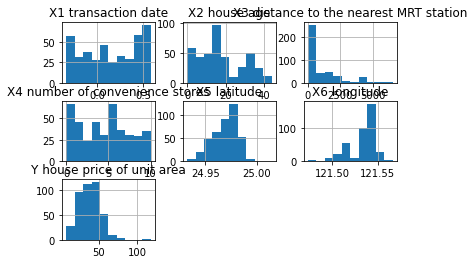

In [5]:
## check the distribution of all variables in the dataset
data.hist()

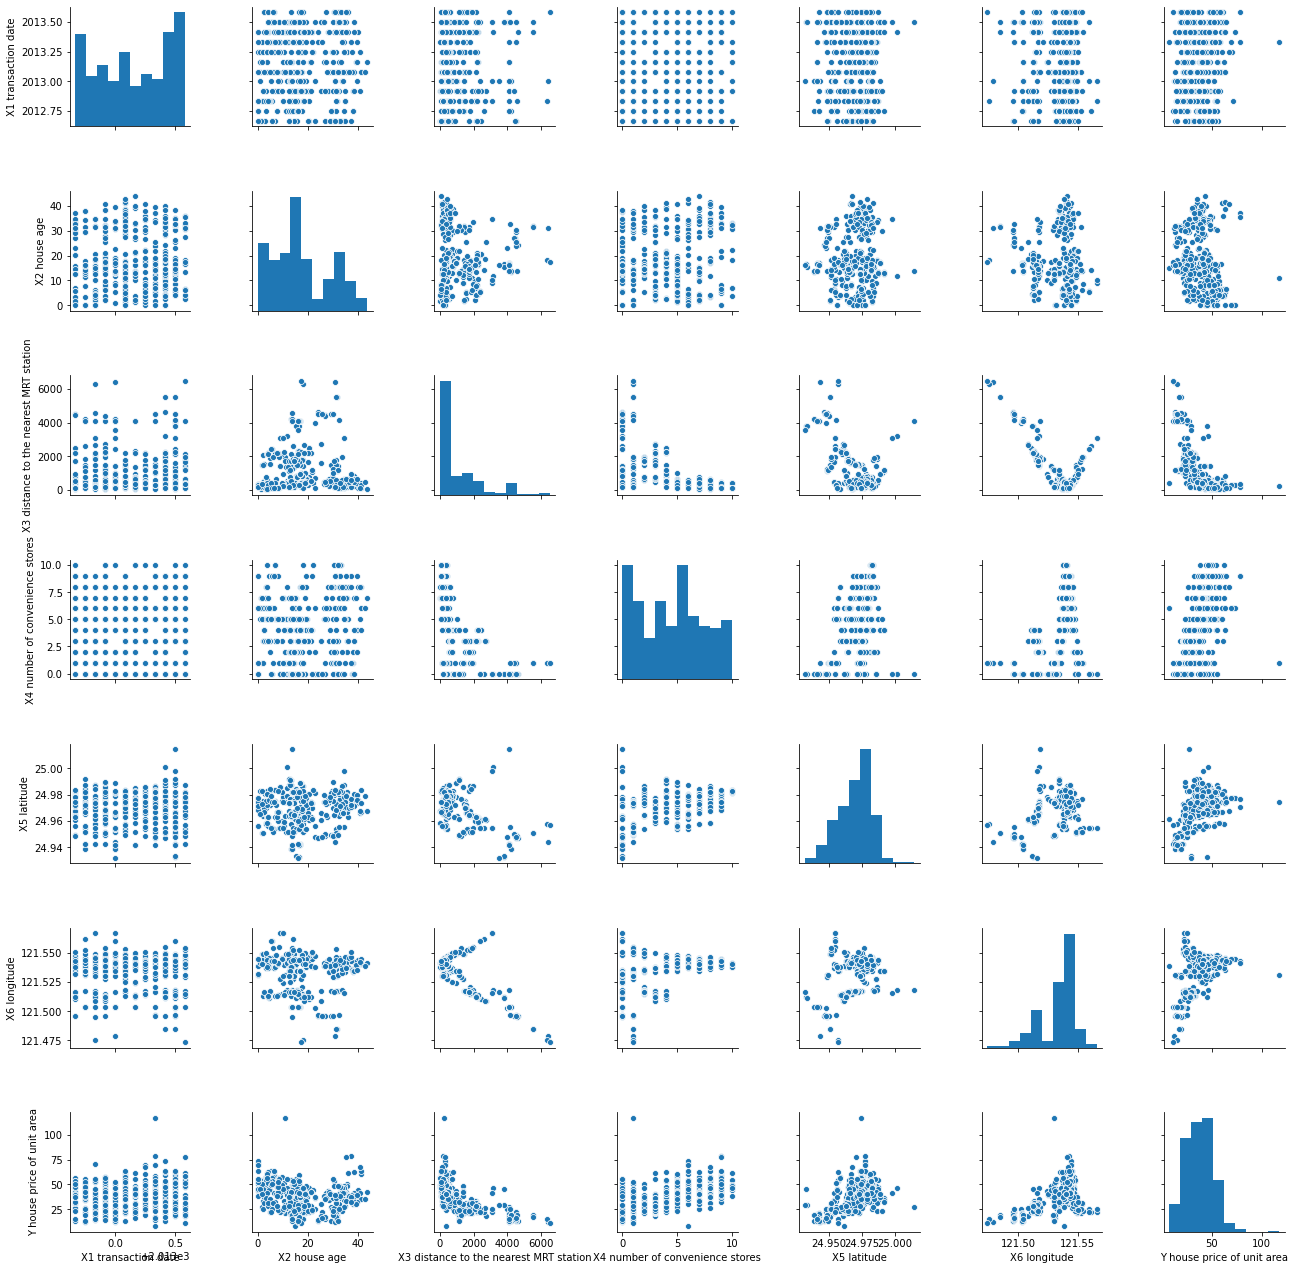

In [6]:
## visauzlie the relationship between variables
g = sns.pairplot(data)

As we can see from the plots, x variables do not have much correlations.
Y variable (House price) is negatively correlated with distance to the nearest MRT station and house age.
It is reasonable that if the age of house if old, the price would be lower.
Additionally, if the house is far from the station, the price would be lower.

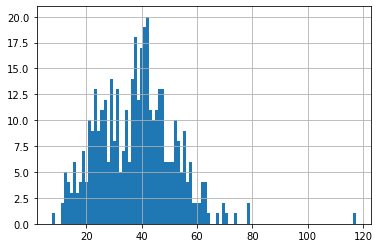

In [7]:
## check the distribution of y variable (house price of unit area)
y = data['Y house price of unit area']

y.hist(bins=100)

In [8]:
## check the statistics of y variable
display(y.describe())

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

As we can see from the statistics and histogram, the range of house price of unit area is from 7 to 117. We will split them into 5 different categories (1-15, 15630, 31-45, 46-60, 61-76, and 76+). 

In [9]:
def get_house_group(price):
    if  price< 16:
        return '0'
    elif price >= 16 and price < 31:
        return '1'
    elif price >= 31 and price < 46:
        return '2'
    elif price >= 46 and price < 61:
        return '3'
    elif price >= 61 and price < 76:
        return '4'
    else:
        return '5'

In [10]:
## divide y variables into several groups and drop the actual price and get price_group
data['Price_Group'] = data['Y house price of unit area'].apply(get_house_group)
data = data.drop(data.columns[-2],axis=1)

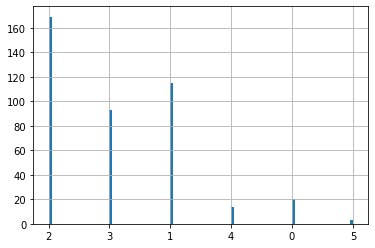

In [11]:
## check the distribution of new y variable
yy = data['Price_Group']
yy.hist(bins=100)

In [12]:
## get counts of each category
data['Price_Group'].value_counts()

2    169
1    115
3     93
0     20
4     14
5      3
Name: Price_Group, dtype: int64

As we already converted the house groups into integers, we do not need to use LabelEncoder or DictVectorizer to make this variable as integers.

In [13]:
## display the final data
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Price_Group
0,2012.917,32.0,84.87882,10,24.98298,121.54024,2
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,3
4,2012.833,5.0,390.56840,5,24.97937,121.54245,2


In [14]:
#Dividing data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Price_Group'], axis=1), data['Price_Group'], stratify=data['Price_Group'], test_size = 0.3, random_state=7)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (289, 6)
y_train shape: (289,)
X_test shape: (125, 6)
y_test shape: (125,)


## Fit several models (Logistic Regression, K Nearest Neighbors, Decision Trees and Random Forest)

In [15]:
## fit the Logistic Regression Model
lr = LogisticRegression().fit(X_train, y_train)

C:\Users\gmrwh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
## fit K Nearest Neighbors Model with n = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
## fit Decision Tree model
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
## fit Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=123456)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=123456)

In [19]:
#making prediction on training set for each model
lr_pred_train = lr.predict(X_train)
knn_pred_train = knn.predict(X_train)
dtc_pred_train = dtc.predict(X_train)
rf_pred_train = rf.predict(X_train)

In [20]:
#making prediction on test set for each model
lr_pred_test = lr.predict(X_test)
knn_pred_test = knn.predict(X_test)
dtc_pred_test = dtc.predict(X_test)
rf_pred_test = rf.predict(X_test)

In [21]:
# Evaluate the model
#calculating accuracy score on training set for each model
print("Acc on training set with Logistic Regression:", accuracy_score(y_train, lr_pred_train))
print("Acc on training set with K Nearest Neighbors:", accuracy_score(y_train, knn_pred_train))
print("Acc on training set with Decision Treen:", accuracy_score(y_train, dtc_pred_train))
print("Acc on training set with Random Forest:", accuracy_score(y_train, rf_pred_train))

Acc on training set with Logistic Regression: 0.6505190311418685
Acc on training set with K Nearest Neighbors: 0.7820069204152249
Acc on training set with Decision Treen: 0.9896193771626297
Acc on training set with Random Forest: 0.9896193771626297


In [22]:
# Evaluate the model
#calculating accuracy score on test set for each model
print("Acc on test set with Logistic Regression:", accuracy_score(y_test, lr_pred_test))
print("Acc on test set with K Nearest Neighbors:", accuracy_score(y_test, knn_pred_test))
print("Acc on test set with Decision Treen:", accuracy_score(y_test, dtc_pred_test))
print("Acc on test set with Random Forest:", accuracy_score(y_test, rf_pred_test))

Acc on test set with Logistic Regression: 0.6
Acc on test set with K Nearest Neighbors: 0.632
Acc on test set with Decision Treen: 0.672
Acc on test set with Random Forest: 0.728


<BarContainer object of 4 artists>

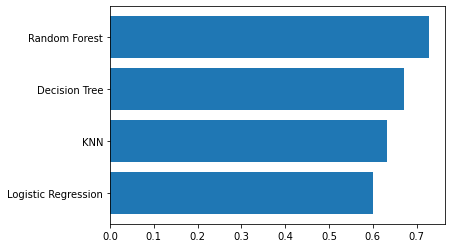

In [23]:
# Visualize the results of comparion
accuracy = []
accuracy = [accuracy_score(y_test, lr_pred_test),accuracy_score(y_test, knn_pred_test),accuracy_score(y_test, dtc_pred_test),accuracy_score(y_test, rf_pred_test)]
model = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
plt.barh(model,accuracy)

We have built 4 different models without any parameter tuning (e.g. number of K in KNN, number of trees in Decision trees, max_depth and max_features in Random Forest). Based on the basic and simple model, I would say that Random Forest is the best model for classification with the highst accuracy (0.73).
We might be able to improve the accuracy with the proper parameter tuning. 
The another option to increase the accuracy would be set up the different training and test size.
Also, the dataset with higher samples would be helpful to increase the accuracy of classification.
With our dataset, we divided house price into 5 groups. Initially, i wanted to group it into 8 different groups but it was not able to fit the model with 8 groups because one of the groups had only one samples which would not let the model train with one sample.